# First Steps


### Table of Contents

* [1. Notes](#Notes)
    * [Playback](#Playback)
    * [Pitch](#Pitch)
    * [Duration](#Duration)
        * [Shorthand](#Entering-durations-in-shorthand)
    * [Explicit Offset](#Explicit-Offset)
    * [Notation](#Notation)
* [2. Chords](#Chords)
* [3. Sidenote: Enharmonic Spelling](#Enharmonic-Spelling)
* [4. Glissando](#Glissandi)
* [5. Chain: a sequence of notes/chords](#Chain)
    * [Operations on Chains (inverse, reverse, ...)](#Operations-on-Chains)
    * [Offset](#Offset)
* [6. Multiple Voices](#Multiple-Voices)

-------------------

In [1]:
# Import everyting in the maelzel.core namespace
from maelzel.core import *

# pitchtools defines many useful conversion functions from/to notenames, frequencies, midinotes, etc
from pitchtools import f2m

# the display function allows to display the html representation of objects
from IPython.display import display

## Notes

The simplest note possible is just a pitch.

For notation/playback a default duration will be assumed if no duration is given

4C:1♩
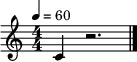

In [2]:
Note("C4")

### Playback

A Note can be played via its `.play` method. By default, a piano soundfont (distributed with *maelzel*) will be used as the default instrument.

> **NB**: when this notebook is displayed as part of the documentation it is made static so any 
> interactive elements are removed. For that purpose we render the results in order for the 
> generated audio to be embedded in the html

In [4]:
note = Note("C4")
note.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:piano:501.0003, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=60 ...)

By just replacing `.play` with `.rec` it can also be recorded to a soundfile

OfflineRenderer(sr=44100)
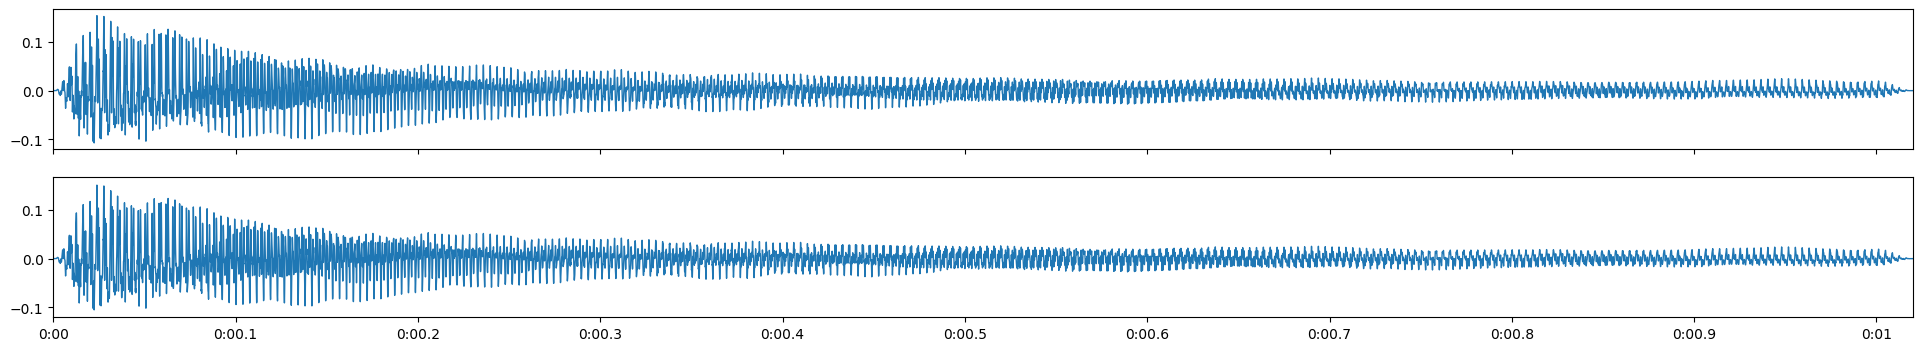

In [4]:
note.rec()

### Pitch

The pitch of a note can be given as a **fractional midinote** or as a **string**. If the pitch deviates from a round 1/8 tone, the cents deviation from the nearest semitone will be shown as a text label (see the 4th note, which is a *E4* 20 cents higher). Pitches can also be given as an absolute frequency and as a frequency deviation from a semitone. **The actual enharmonic representation is not fixed by how the pitch was entered: it depends on the context (surrounding pitches, chords, etc)** (see [Enharmonic Spelling](#Enharmonic-Spelling)).  

**NB**: a `Chain` creates a sequence of notes/chords

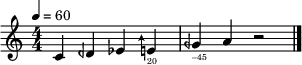

OfflineRenderer(sr=44100)
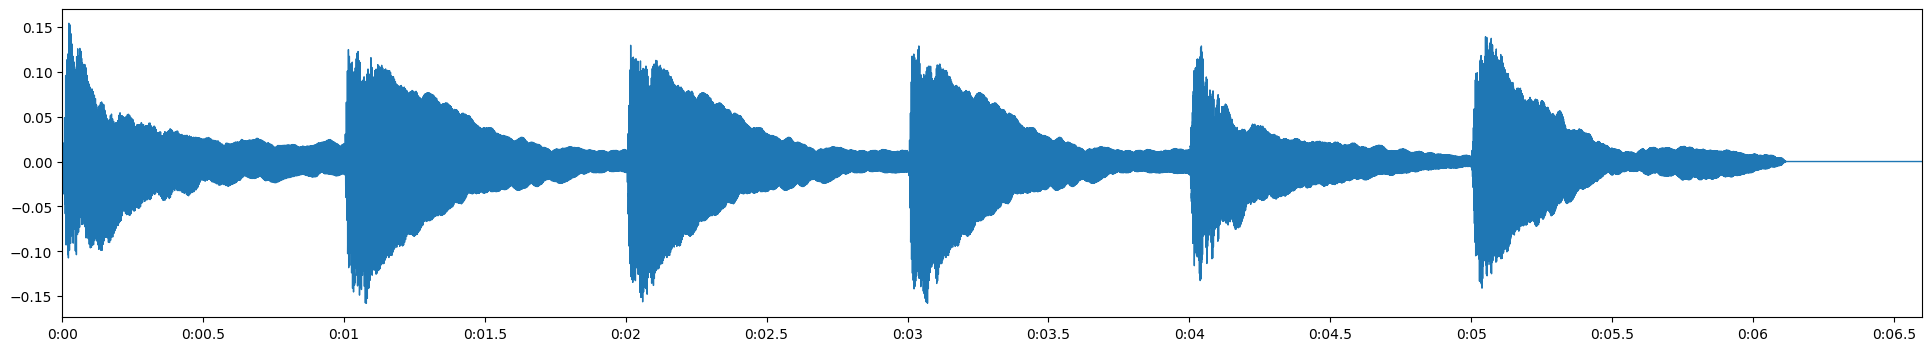

In [5]:
# All these are valid ways to indicate a pitch

seq = Chain([
    Note(60), 
    Note("c#4+"), 
    Note("4Eb"), 
    Note("4E+20"), 
    Note("4G-10hz"),
    Note("442hz"), 
])
seq.show()

# Record output as mono, add some sustain to simulate legato and some extra time 
# at the end of the recording (this avoids a sudden stop in playback in the browser) 
seq.rec(nchnls=1, sustain=0.1, extratime=0.5)

#### Transposition

An interval can be added to a note. This will result in a transposed note

4D:1♩
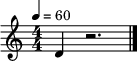

In [6]:
c4 = Note("c4")
c4 + 2

3B+:1♩
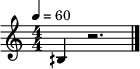

In [7]:
c4 - 0.5

A note can be compared against another note, pitch or string (as long as the string can be interpreted as a notename)

In [8]:
c4 > "b3"

True

In [9]:
c4 < 72

True

### Duration 

**The duration of a Note is given in quarternotes**. This duration is **symbolic**: its real time duration in seconds **depends on tempo**.

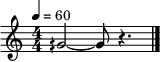

OfflineRenderer(sr=44100)
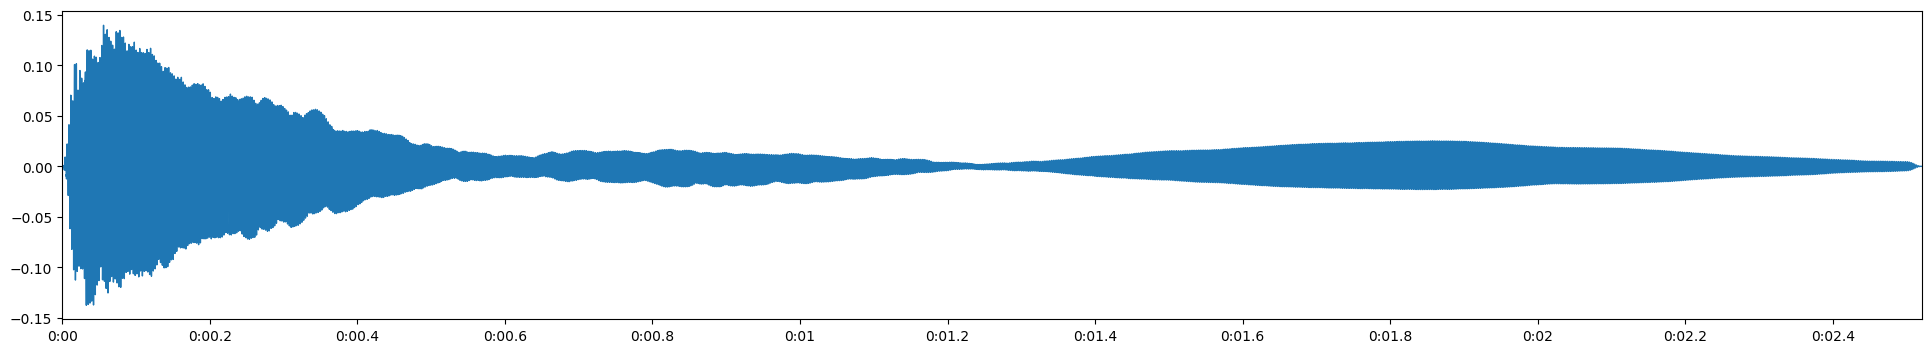

In [10]:
setTempo(60)

note = Note(67.5, dur=2.5)
note.show()
note.rec(nchnls=1)


The same note with a faster tempo results in the same notation (minus the metronome mark) but playback is shortened)

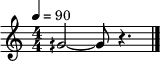

OfflineRenderer(sr=44100)
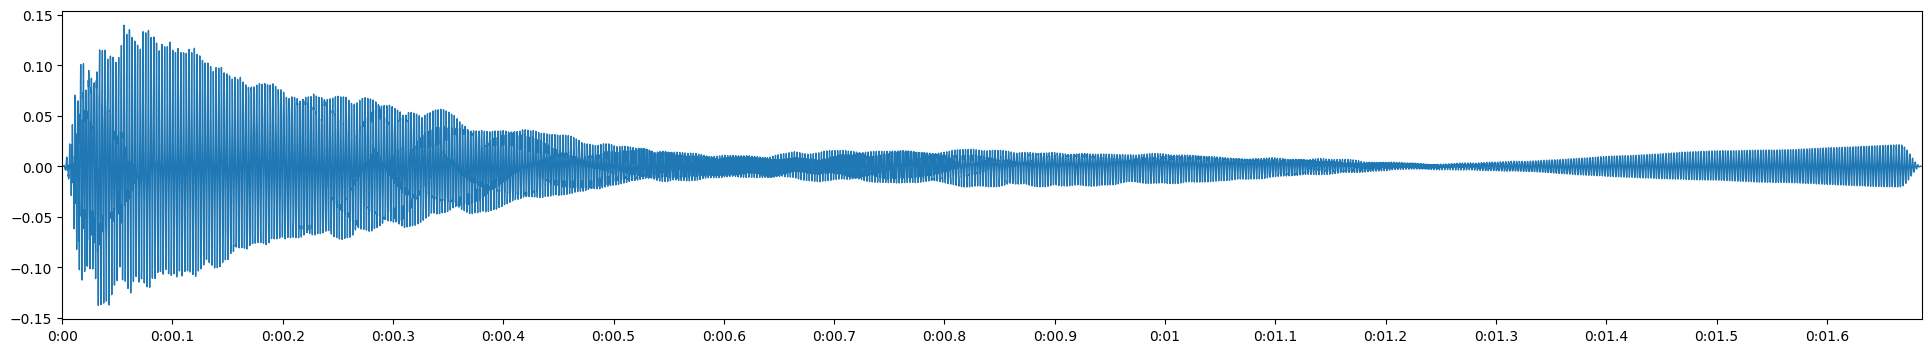

In [11]:
setTempo(90)

note.show()
note.rec(nchnls=1).show()

# Reset the tempo to 60
setTempo(60)

Chain([4C:0.5♩, 4C>:0.5♩, 4C#:0.5♩, 4D+:0.5♩, 4D#:0.5♩, 4G+27:0.5♩])
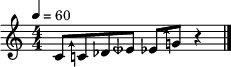

In [12]:
pitches = ("C4", 60.25, "4c#", 62.5, "4Eb", f2m(400))
sequence = Chain([Note(p, 0.5) for p in pitches])

# Outside of jupyter you need to call `.show()` in order to display the object. 
# Inside jupyter you can simply set the object as the last line of a cell
sequence

OfflineRenderer(sr=44100)
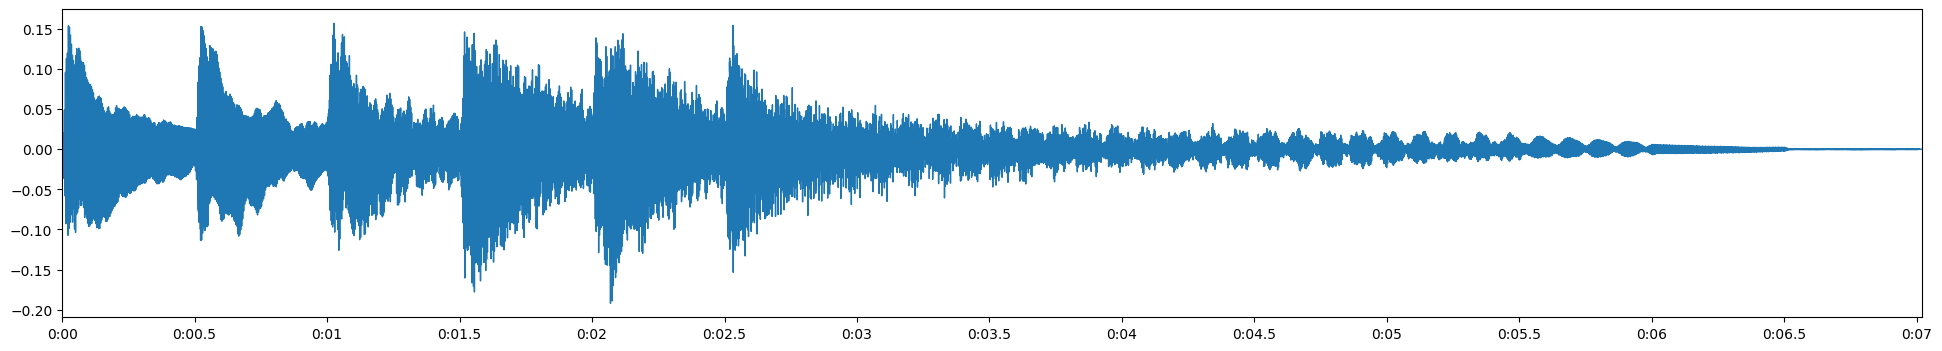

In [13]:
sequence.rec(nchnls=1, sustain=4)

Any duration can be given. For example, **triplets**:

Chain([4C:0.333♩, 4C>:0.333♩, 4C#:0.333♩, 4D+:0.333♩, 4D#:0.333♩, 4G+27:0.333♩])
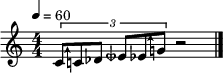

In [14]:
Chain([Note(p, 1/3) for p in pitches])

We can test different durations. The quantization engine will try to find the best representation for each rhythm

Notice how, for nested tuplets, the quantization algorithm decides to place the smaller tuplet (in these cases the triplet) as the outter tuplet. This makes the rhythms easier to read.

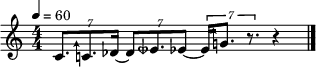

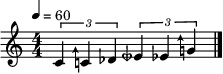

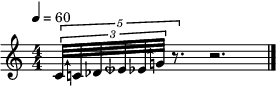

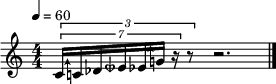

In [15]:
durations = [
    "3/7",    # By entering a fraction as a string we ensure that there are no rounding errors
    F(2, 3),
    F(1, 5)*F(1, 3),
    F(1, 3)*F(2, 7),
]

for duration in durations:
    chain = Chain([Note(p, duration) for p in pitches])
    chain.show()

#### Entering durations in shorthand

When entering notes there are some **shortcuts** possible. For example, when using a string to set the pitch of a note, it is possible to set the duration as well by using the following formats:

    <pitch>:<duration in quarternotes>   (example: 4Db:1.5 -> a dotted quarternote)
    <pitch>/<musical duration>           (example: 4Db/4.  -> a dotted quarternote)
    
* In the first format, the duration is given as **quarternotes**, so 0.5 is an eighth note, 0.25 is a 16th note, etc.
* In the second format, the duration is given as **symbol**: 4 represents a quarter-note, 8 represents an 8th-note, 16 a 16th-note, etc. Dots can also be added

Chain([4C:0.5♩, 4C:0.5♩, 4C:0.5♩, 4D:0.75♩, 4D:0.75♩, 4D:0.75♩, 4E:0.25♩, 4E:0.25♩, 4E:0.25♩])
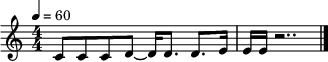

In [16]:
Chain([
    Note("4C", 0.5),
    Note("4C:0.5"), 
    Note("4C/8"),
    
    Note("4D", 0.75),
    Note("4D:.75"),
    Note("4D/8."),
    
    Note("4E", 0.25),
    "4E:.25",           # The string is enough to construct a note within a Chain
    "4E/16", 
])


### Explicit Offset

Notes can have an **explicit start time** called **offset**. This can be useful when there is a need to **sync** with other time-based media, such as an audio file, a video, etc. For notation the quantizer will find the most appropriate subdivision according to your settings (the configuration of notational complexity will be discused later). Playback will respect your given start time, independently of the rounding effects regarding notation.

#### Beat Time vs Absolute Time

All time indications are given in *beat time* (also known as *quarternote time*). An offset or a duration express the time in terms of quarternotes. The absolute duration in seconds will depend on the tempo at the given moment

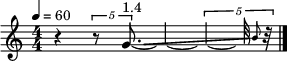

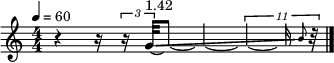

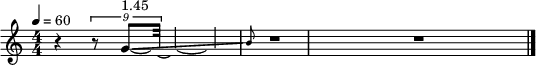

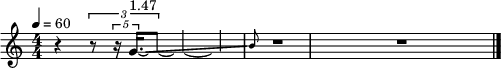

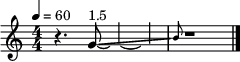

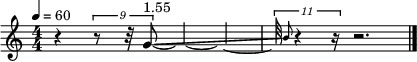

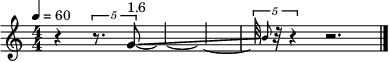

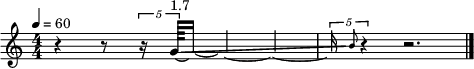

In [17]:
offsets = [1.4, 1.42, 1.45, 1.47, 1.5, 1.55, 1.6, 1.7]
for offset in offsets:
    n = Note("4G", dur=2.5, offset=offset, gliss="4B", label=str(offset))
    n.show()    

### Pure Notation

Many **purely notational aspects** of a note/chord can be customized. These elements **do not have an impact regarding playback**. For example, a note can have an articulation, a size, color, etc. Here are some examples

4F>:1.4♩:offset=0.2:symbols=[Color(value=#0000f0), Notehead(square, size=1.3), Articulation(kind=accent)]
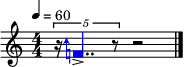

In [18]:
n = Note("4F+25", offset=1/5, dur=7/5)
n.addSymbol(symbols.Color('#0000f0'))
n.addSymbol(symbols.Notehead('square', size=1.3))
n.addSymbol(symbols.Articulation('accent'))
n

4G:0.8♩:offset=0.2:symbols=[Notehead(slash, color=green), Articulation(kind=snappizz)]
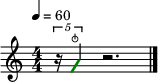

In [19]:
n = Note("4G", dur=F(4, 5), offset="1/5")
n.addSymbol(symbols.Notehead(shape='slash', color='green'))
n.addSymbol(symbols.Articulation('snappizz'))
n

------

## Chords

A Chord is very similar to a Note but it allows multiple pitches. 


>    A chord contains one or more Notes. These are interpreted as pitches and have no individual 
>    duration (the `.dur` attribute is ignored). On any other aspects they are fully fledged 
>    notes and can be customized individually

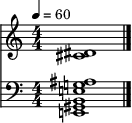

OfflineRenderer(sr=44100)
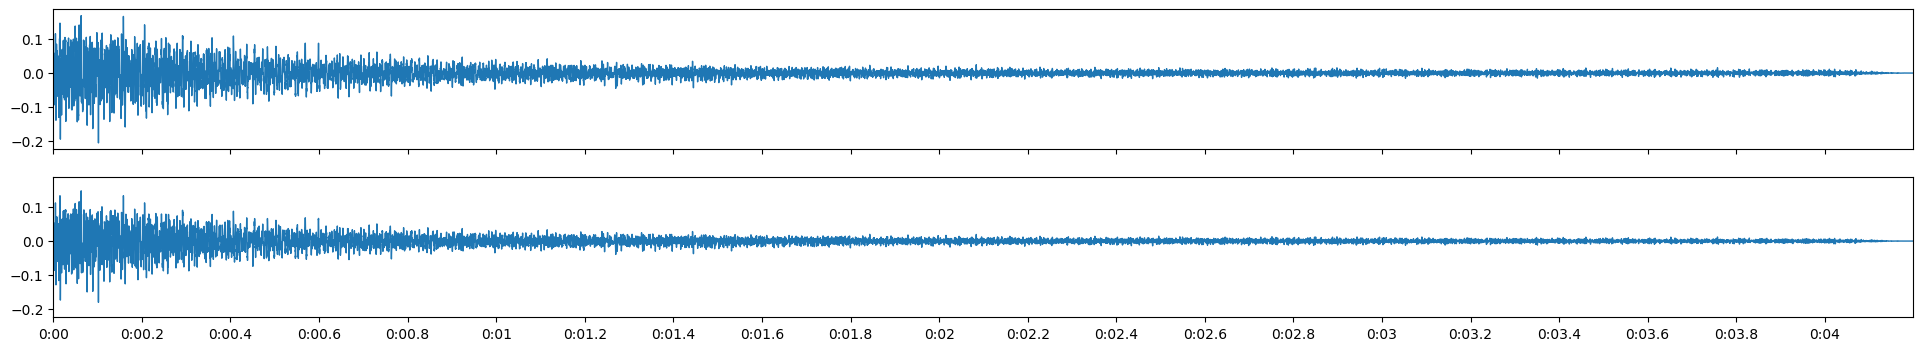

In [2]:
setScoreStruct(timesig='4/4', tempo=60)
ch = Chord("E2 G#2 B2 E3 G3 Bb3 Db4 Eb4", dur=4)
ch.show()
ch.rec("tmp/stravinsky.ogg", fade=(0, 0.2))

The same chord distributed explicitely between two voices

Notice how the enharmonic spelling algorithm chooses a **different spelling** here in comparison to the example above. This is because above **the chord is is distributed between two systems**, whereas in this example the chords are **manually split** and **unaware** of each other (the spelling algorithm works at the part level)

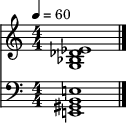

In [3]:
left = Chord("E2 G#2 B2 E3", 4)
right = Chord("G3 Bb3 Db4 Eb4", 4)
score = Score([right, left])
score.show()

A Chord is made out of Notes, so **each note can be given own parameters**.

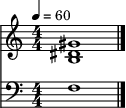

OfflineRenderer(sr=44100)
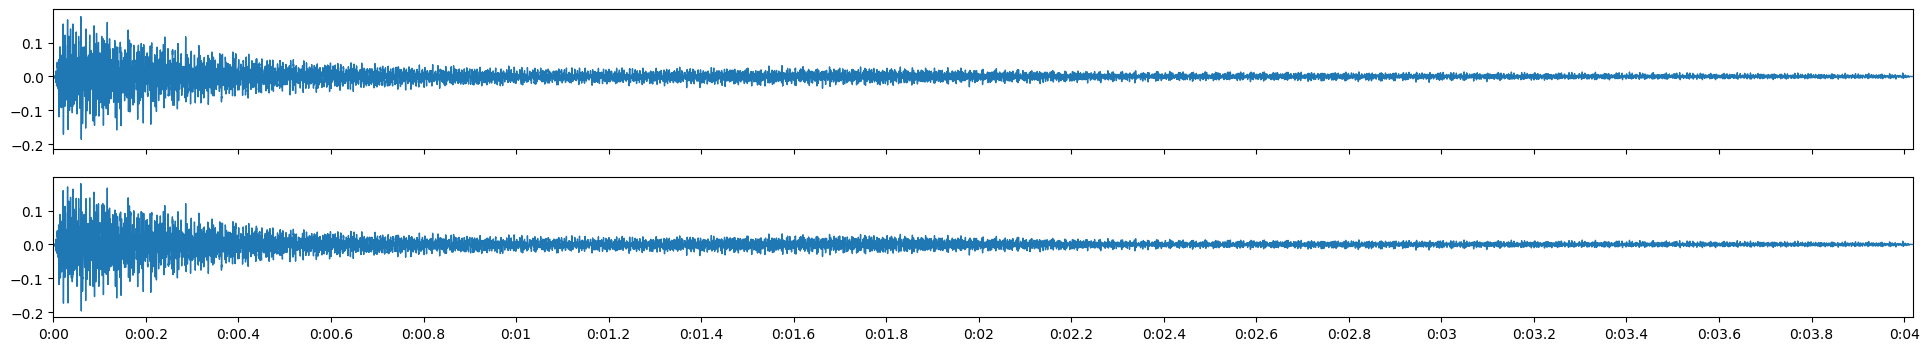

OfflineRenderer(sr=44100)
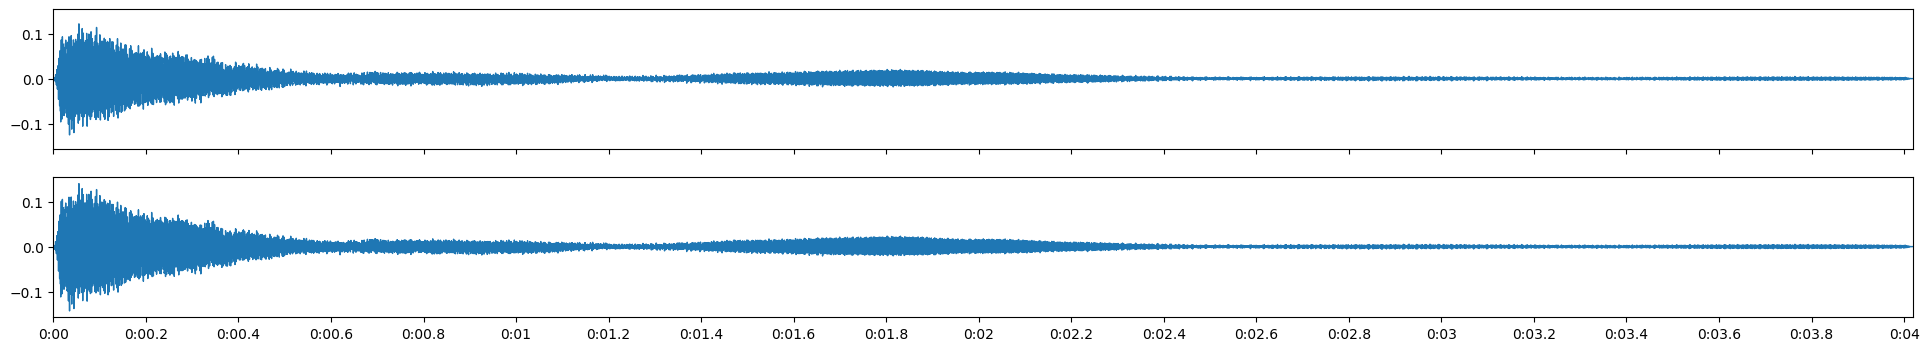

In [4]:
chord = Chord("3f 3b 4d# 4g#", dur=4)
chord.show()

chord.rec("tmp/tristan.ogg").show()

# Chords are always sorted by pitch. The last note is the highest
chord[-1].amp = 0.8               

for note in chord[:-1]:
    note.amp = 0.1

chord.rec("tmp/chord-with-different-amplitudes.ogg").show()

## Enharmonic Spelling

A small detour about spelling: in general **the enharmonic spelling routine chooses the best spelling for any notes according to the context**. Even if the pitch is given as a notename, by default the engine will still insist in using its own spelling. See for example:

‹4Eb 4G 4Bb 4♩›
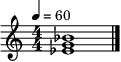

In [5]:
chord = Chord("G4 Bb4 D#4", 4)
chord


In order to force the spelling there are two different ways:
    
1. Append a `!` sign to the notename
2. Set the config key `fixStringNotenames` to True (`getConfig()['fixStringNotenames'] = True`). If this is set to True any pitch given as a string is interpreted as being fixed (as if it had an implicit `!` sign)

Notice that fixing a pitch spelling has consequences for the context of that pitch. In the previous case, fixing the spelling of the `D#` modifies the spelling of the rest of the chord. One would need to fix all the pitches in order to force the spelling as is. 

**NB**: there are some enharmonic spellings which are not used by default. These include double alterations in the form of `Dbb` (enharmonic of `C`) or spellings like `E#` (enharmonic of `F`)

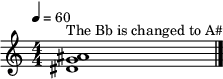

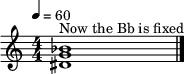

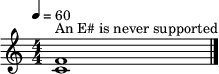

In [18]:
Chord("G4 Bb4 D#4!", 4, label='The Bb is changed to A#').show()
Chord("G4 Bb4! D#4!", 4, label='Now the Bb is fixed').show()
Chord("4C 4E#!", 4, label='An E# is never supported').show()

## Glissandi

The pitch of a Note or Chord does not need to be static. In each case it is possible to define a **glissando** (the `.gliss` attribute) for the given duration of the event. 

**NB**: you can set an explicit target for a glissando or you can set the `.gliss` attribute to True, in which case the following event in the sequence determines the target pitch of the glissando

4G:1♩:gliss=4B
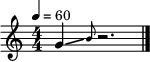

In [20]:
Note("4G", gliss="4B")

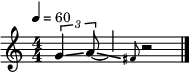

OfflineRenderer(sr=44100)
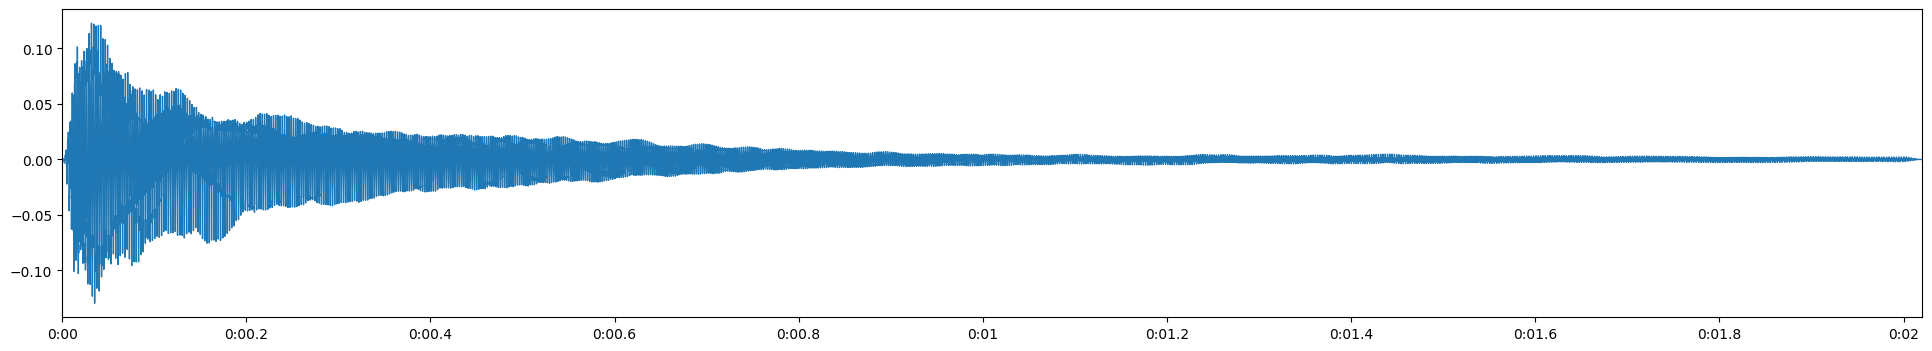

In [5]:
chain = Chain([
    Note("4G", 2/3, gliss=True),
    Note("4A", 4/3, gliss="4F#")
])
chain.show()
chain.rec(nchnls=1)
    

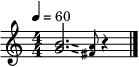

OfflineRenderer(sr=44100)
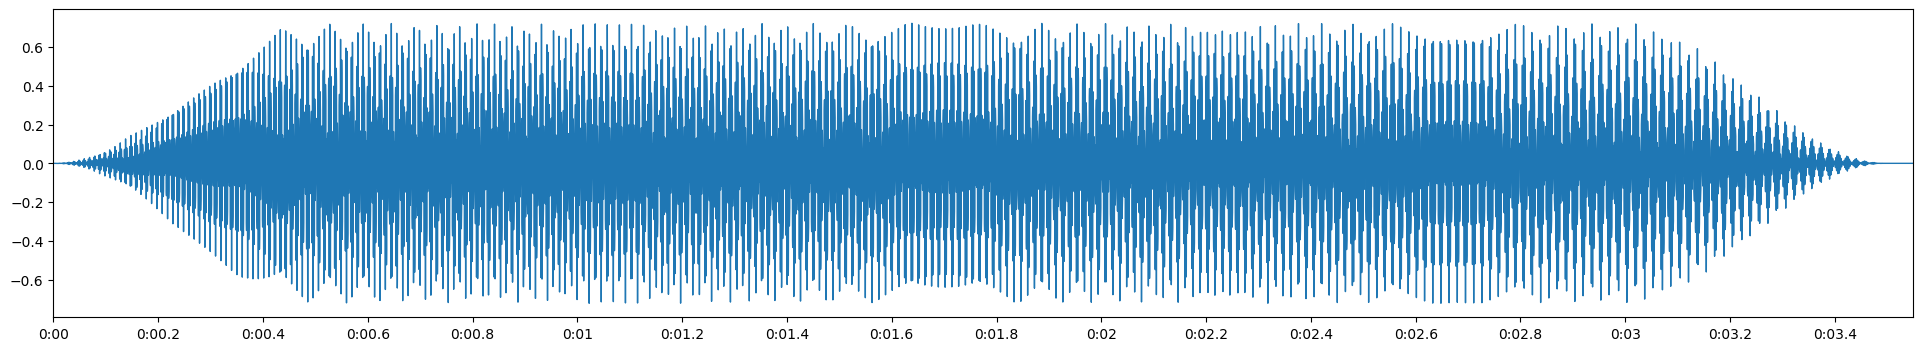

In [6]:
ch = Chord("4G 4B", 3, gliss="4G- 4A")
ch.show()
ch.rec(instr='tri', fade=0.5, nchnls=1, extratime=0.55)

Series of chord glissandi are also possible. Here we render using a triangular wave

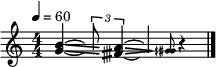

OfflineRenderer(sr=44100)
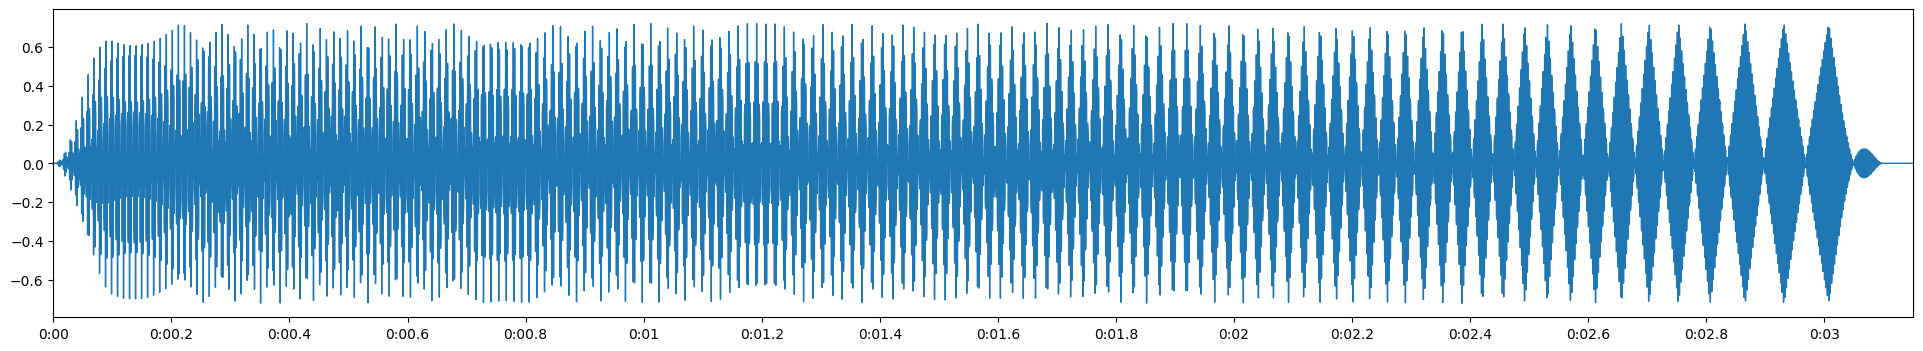

In [7]:
chain = Chain([
    Chord("4G 4B", 4/3, gliss=True),
    Chord("4G- 4A", 5/3, gliss="4G+ 4Ab")
])
chain.show()
chain.rec(instr='tri', nchnls=1, fade=0.1, extratime=0.15)

## Chain

As seen in many previous examples, a `Chain` is used to represent a sequence of notes or chords

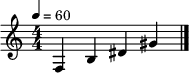

OfflineRenderer(sr=44100)
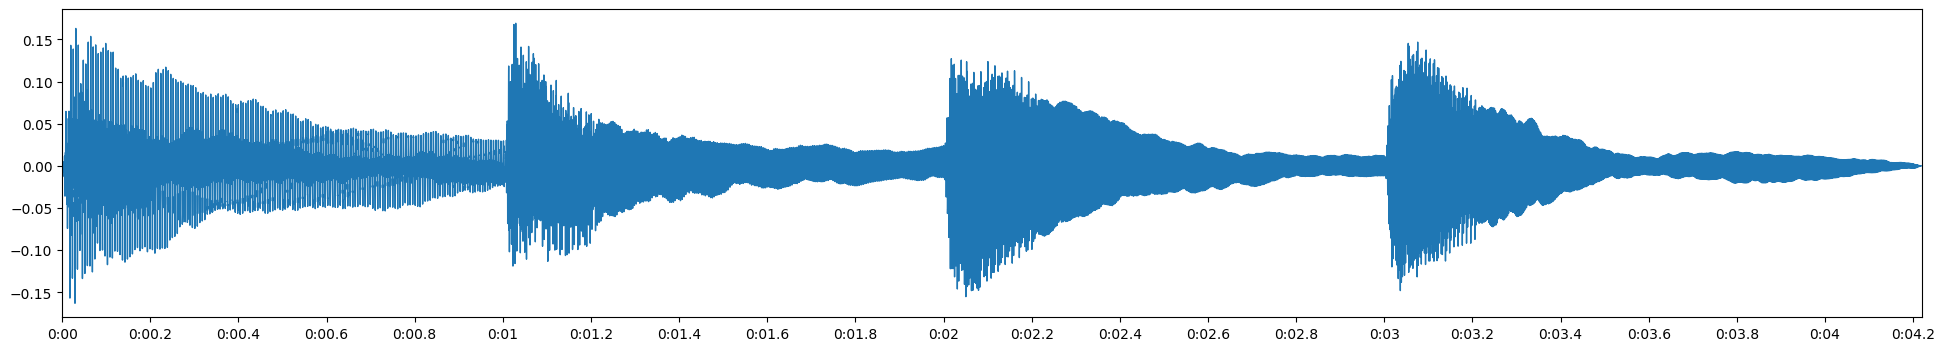

In [9]:
chain = Chain("3f 3b 4Eb 4g#".split())
chain.show()
chain.rec(nchnls=1, sustain=0.2)

Notes within a chain can have **different durations**

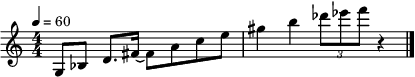

OfflineRenderer(sr=44100)
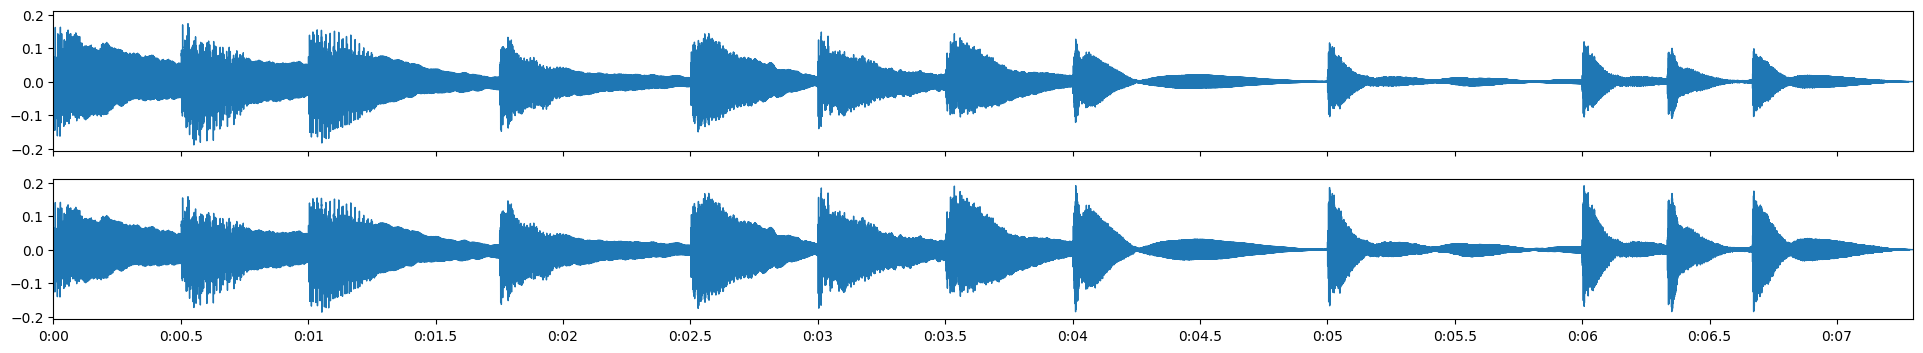

In [6]:
chain = Chain([
    Note("3G", 0.5),
    Note("3Bb", 0.5),
    Note("4D", 0.75),
    Note("4F#", 0.75),
    Note("4A", 0.5),
    Note("5C", 0.5),
    Note("5E", 0.5),
    Note("5G#", 1),
    Note("5B", 1),
    Note("6C#", 1/3),
    Note("6Eb", 1/3),
    Note("6F", 1/3)
])
chain.show()
# sustain adds an extra duration to the playback. This helps when playing a sequence legato
chain.rec(sustain=0.15, fade=(0, 0.15))

### Operations on Chains

Chains are useful to express operations on a sequence of notes or pitches

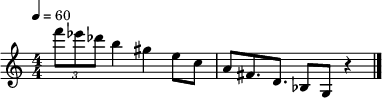

OfflineRenderer(sr=44100)
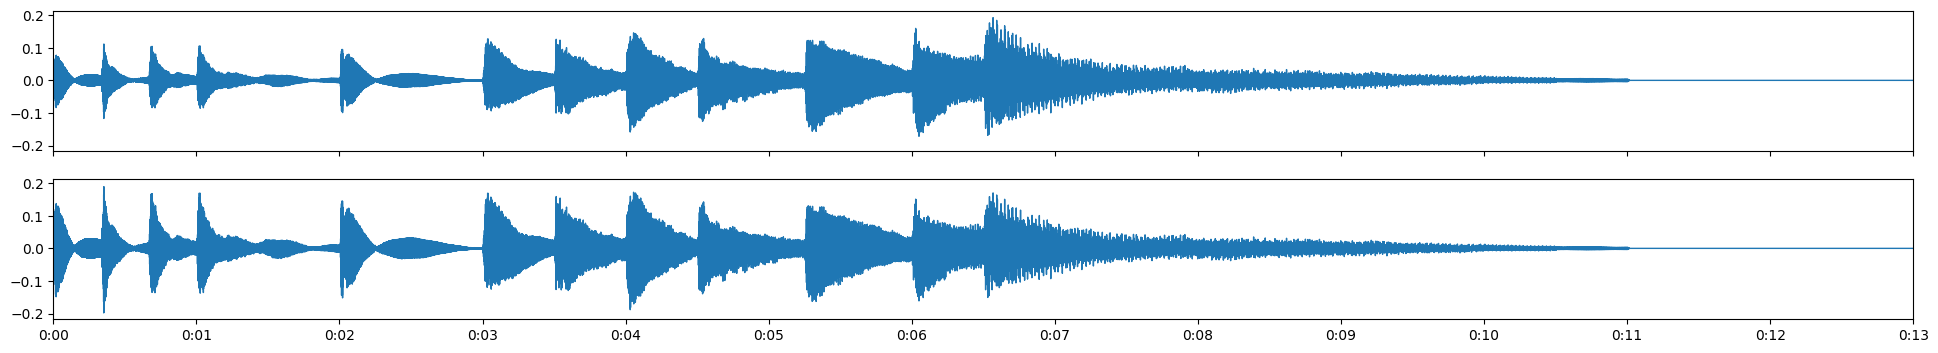

In [7]:
chainReversed = Chain(chain.items[::-1])
chainReversed.show()
# Add sustain to simulate the pedal being down
chainReversed.rec(sustain=4, extratime=2)


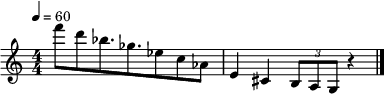

OfflineRenderer(sr=44100)
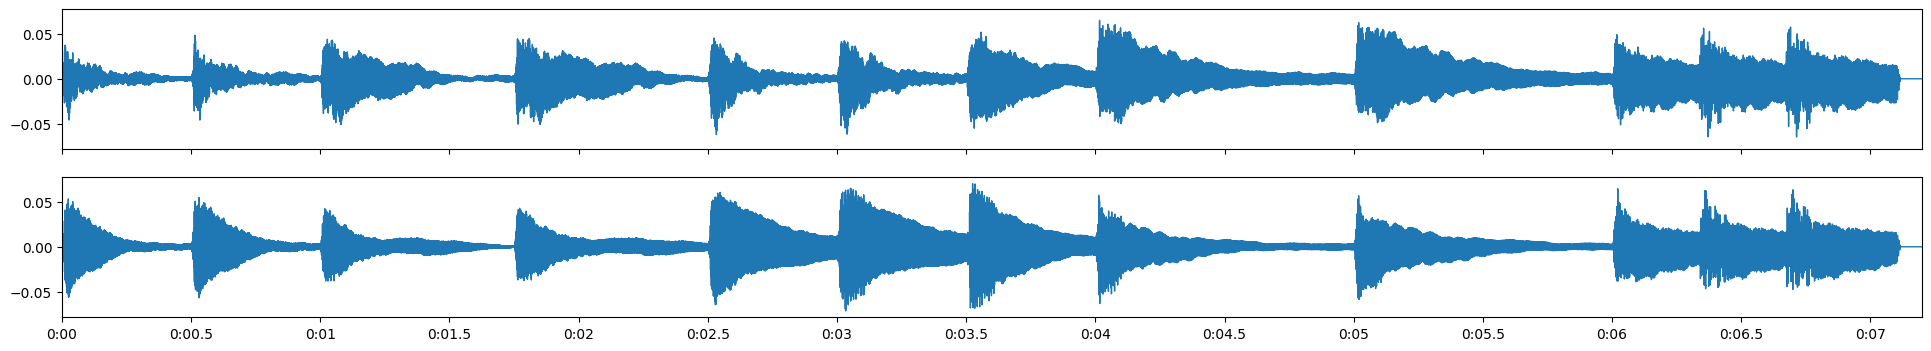

In [19]:
chainInv = chain.invertPitch(pivot="5C")
chainInv.show()
# A little sustain can be used to simulate legato
chainInv.rec(extratime=0.1, sustain=0.1)

### Offset


Within a Chain, **notes are stacked together**, as long as they do not have an **explicit offset**. A gap within items in a chain can be achieved by either an explicit offset or by a Rest

Any start time within a Chain is interpreted as **relative to the beginning** of the chain (a Chain can have also an explicit offset or be placed within another Chain)

Chain([4C:1♩, 4D:0.5♩, 4F:2♩:offset=5])
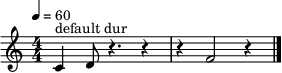

In [3]:
chain = Chain([
    Note("4C", label='default dur'),
    Note("4D", dur=0.5),
    Note("4F", dur=2, offset=5)
])
chain

**A chain itself can have an explicit offset**. The offset of each note within a chain is relative to the beginning of the chain. 

Chain([4C:1♩, 4D:0.5♩, 4F:2♩:offset=5, Chain([4G:1♩:symbols=[Slur(kind=start, uuid=r33b92cj, linetype=solid)], 4D#:1♩:symbols=[Slur(kind=end, uuid=r33b92cj, linetype=solid)]])], offset=2)
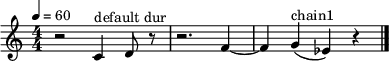

In [5]:
chain1 = Chain([
    "4G:1",
    "4Eb:1"
])
chain1.addSpanner('slur')
chain1[0].label='chain1'

chain2 = Chain([
    Note("4C", label='default dur'),
    Note("4D", dur=0.5),
    Note("4F", dur=2, offset=5),
    chain1
], offset=2)
chain2
    

-----------

## Multiple Voices

A **Voice** is very similar to a Chain. 

* A Voice contains a sequence of non-overlapping objects (notes, chords, rests, clips)
* A Voice can also contain other Chains. 
* A voice has always an offset of 0. 
* A Voice corresponds to a part in a Score - they can be stacked together to create a **Score**.

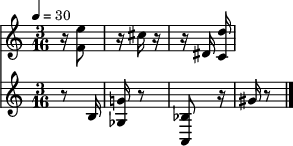

OfflineRenderer(sr=44100)
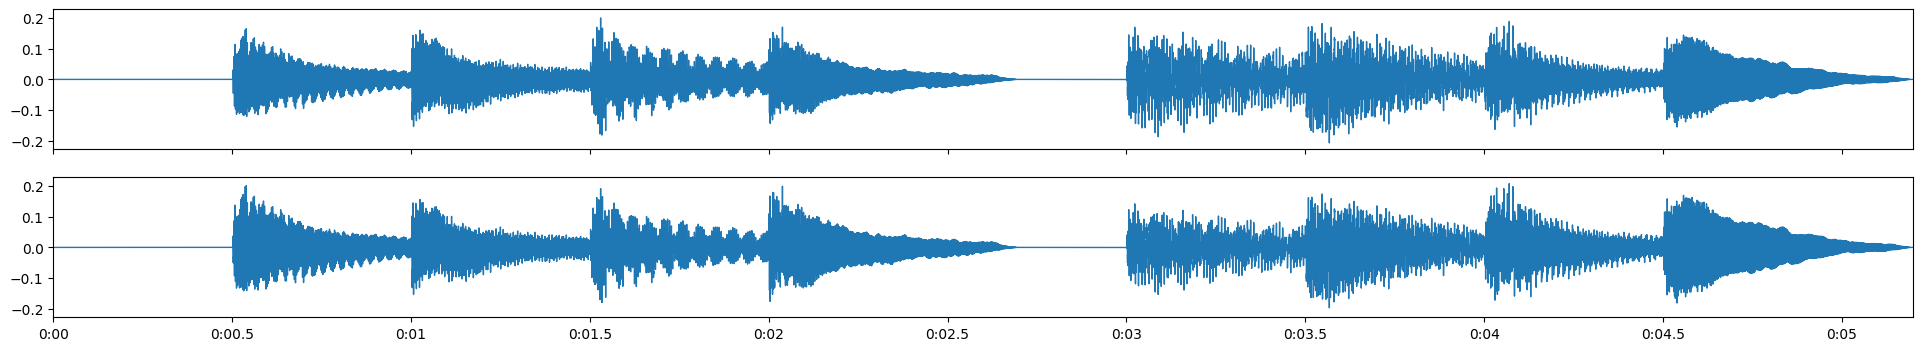

In [6]:
from maelzel.core import *

# It is possible to create notes/chords in a variety of ways

righthand = Voice([
    Rest(0.25), 
    Chord("4F 5E", 0.5),
    Rest(0.25),
    Note("5C#", .25),
    Rest(.5),
    "4Eb:.25",    
    "4C,5D:.25"
])

lefthand = Voice([
    "R/8",
    "3B/16",
    "3F#,4G:.25",
    "R/8",
    "2A,3Bb/8",
    "R/16",
    "4G#/16"
])

score = Score([righthand, lefthand])

# Create a score structure with a time signature of 3/16 with tempo ♪. = 40
setScoreStruct(timesig=(3, 16), tempo=30)

score.show()
score.rec(sustain=0.1, fade=(0, 0.1))